In [26]:
import pandas as pd

In [27]:
rfm = pd.read_csv('rfm.csv')

In [28]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,2866.77
1,12348.0,248,1,17.00
2,12349.0,18,1,1155.75
3,12350.0,310,1,274.00
4,12352.0,36,7,1147.44


In [ ]:
'''
R:距离当前日期越近，得分越高，最高5分，最低1分
        
F:交易频率越高，   得分越高，最高5分，最低1分
M:交易金额越高，   得分越高，最高5分，最低1分

'''

In [ ]:
'''
以上三个指标会将维度再细分出5份，这样就能够细分出5x5x5=125类用户,再根据每类用户精准营销.
显然125类用户已超出普通人脑的计算范畴了。
实际运用上，我们只需要把每个维度做一次两分即可，这样在3个维度上我们依然得到了8组用户(2*2*2)。


即我们可以这样定义

R: 1 if R < R_中位数 else 0 (距今购物间隔越短，代表该用户越活跃)
F: 1 if F > F_中位数 else 0
M: 1 if M > M_中位数 else 0




这样，之前提的问题，就能很容易被解读（编号次序RFM,1代表高，0代表低）

重要价值客户（111）：最近消费时间较近、消费频次和消费金额都很高，必须是VIP啊！
重要保持客户（011）：最近消费时间较远，但消费频次和金额都很高，说明这是个一段时间没来的忠诚客户，我们需要主动和他保持联系。
重要发展客户（101）：最近消费时间较近、消费金额高，但频次不高，忠诚度不高，很有潜力的用户，必须重点发展。
重要挽留客户（001）：最近消费时间较远、消费频次不高，但消费金额高的用户，可能是将要流失或者已经要流失的用户，应当基于挽留措施。

'''

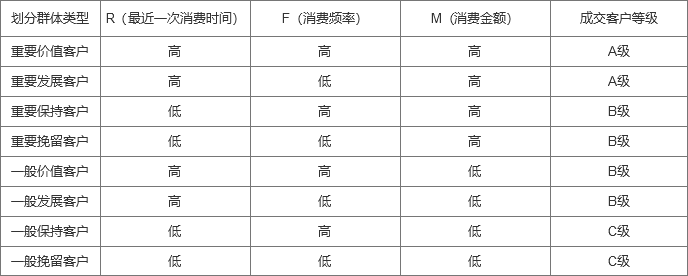

In [ ]:
# 构建RFM判别函数

# R: 1 if R < R_中位数 else 0 
# F: 1 if F > F_中位数 else 0
# M: 1 if M > M_中位数 else 0

In [29]:
def R(x,median):
    return 1 if x < median else 0

def F(x,median):
    return 1 if x > median else 0

def M(x,median):
    return 1 if x > median else 0

In [ ]:
# 构建中位数字典

In [34]:
median_all_dict = rfm.iloc[:,1:].quantile(q=0.5).to_dict()

In [35]:
median_all_dict

{'Recency': 51.0, 'Frequency': 2.0, 'Monetary': 427.4500000000001}

In [ ]:
# 构建RFM label
# three

In [37]:
rfm['R'] = rfm.Recency.apply(lambda x:R(x,median_all_dict.get('Recency')))
rfm['F'] = rfm.Frequency.apply(lambda x:F(x,median_all_dict.get('Frequency')))
rfm['M'] = rfm.Monetary.apply(lambda x:M(x,median_all_dict.get('Monetary')))

In [38]:
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12347.0,2,7,2866.77,1,1,1
1,12348.0,248,1,17.00,0,0,0
2,12349.0,18,1,1155.75,1,0,1
3,12350.0,310,1,274.00,0,0,0
4,12352.0,36,7,1147.44,1,1,1
...,...,...,...,...,...,...,...
4160,18280.0,277,1,160.70,0,0,0
4161,18281.0,180,1,46.92,0,0,0
4162,18282.0,7,2,113.13,1,0,0
4163,18283.0,3,16,2002.63,1,1,1
